Домашнее задание, часть 2.


### Комментарий к решению
Да никаких особых комментариев, все сделано идеально, так что заслуженные 20 баллов :) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('../datasets/Zaynutdinova_Rezeda_drug_consumption.data.txt',header=None)

In [4]:
data = pd.read_csv('Zaynutdinova_Rezeda_drug_consumption_data.txt',header=None)

In [3]:
# Так как я начала делать это домашнее задание в новом ноутбуке, мне необходимо здесь сначала переименовать столбцы

data.columns = ['ID','Age','Gender','Education','Country','Ethnicity','Nscore(Neuroticism)','Escore(Extraversion)','Oscore(Openness)','Ascore(Agreeableness)','Cscore(Conscientiousness)','Impulsiveness','Sensation seeing','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
data.head(3)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore(Neuroticism),Escore(Extraversion),Oscore(Openness),Ascore(Agreeableness),...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0


Итак, теперь собственно к самому заданию.
Передо мной стоит задача классификации - мне необходимо спрогнозировать употреблял ли человек экстази (да или нет).

Подготовка данных

In [4]:
# Для начала уберём ненужные переменные
# Помимо всех наркотиков кроме экстази, я убрала и переменную ID, так как это всего лишь порядковый номер наблюдения, который не представляет интереса нашему прогнозу

columns = ['ID', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 
           'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 
           'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 
           'Mushrooms', 'Nicotine', 'Semer', 'VSA']
data.drop(columns, axis=1, inplace=True)

In [5]:
# Теперь посмотрим есть ли у нас пропуски в переменных

data.isnull().sum()

# К счастью, их не оказалось

Age                          0
Gender                       0
Education                    0
Country                      0
Ethnicity                    0
Nscore(Neuroticism)          0
Escore(Extraversion)         0
Oscore(Openness)             0
Ascore(Agreeableness)        0
Cscore(Conscientiousness)    0
Impulsiveness                0
Sensation seeing             0
Ecstasy                      0
dtype: int64

Теперь создадим новые переменные с помощью One Hot Encoding

In [6]:
# Для начала подсчитаем, сколько уникальных значений принимает данная переменная

len(data['Ecstasy'].unique())

# 7 < 20, значит могу смело делать OHE

7

In [7]:
# OHE

dummies = pd.get_dummies(data['Ecstasy'], prefix='Ecstasy')
data = pd.concat([data, dummies], axis=1)
data.drop(['Ecstasy'], axis=1, inplace=True)

# Я не выкидываю первый столбец, так как именно он будет являться моей целевой переменной

Итак, целевой переменной для нас будет являться Ecstasy_CL0, которая показывает, что человек никогда не употрелял алкоголь (1) или что хоть раз пробовал (0).

In [8]:
# Уберём лишние переменные, явно связнные с целевой
# Убираю все переменные, показывающие, когда человек последний раз употреблял экстази

data.drop(['Ecstasy_CL1', 'Ecstasy_CL2', 'Ecstasy_CL3', 'Ecstasy_CL4', 'Ecstasy_CL5', 'Ecstasy_CL6'], axis=1, inplace=True)

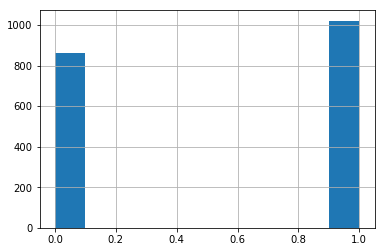

In [9]:
# И посмотрим на распределение целевой переменной

data.Ecstasy_CL0.hist()

А теперь моделирование!

In [10]:
# Разобьём выборку на тренировочную и тестовую

y = data['Ecstasy_CL0'].values
X = data.drop('Ecstasy_CL0',axis=1).values

from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.3)

y_train = data_train['Ecstasy_CL0']
y_test = data_test['Ecstasy_CL0']

X_train = data_train.drop(['Ecstasy_CL0'], axis=1)
X_test = data_test.drop(['Ecstasy_CL0'], axis=1)

In [11]:
# Посмотрим на размер каждой

print(data_train.shape) 
print(data_test.shape)

(1319, 13)
(566, 13)


А теперь, собственно, модели

In [12]:
# Первая модель - случайный лес

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500) 
rfc.fit(X_train, y_train)
y_predicted = rfc.predict(X_test)
y_proba = rfc.predict_proba(X_test)


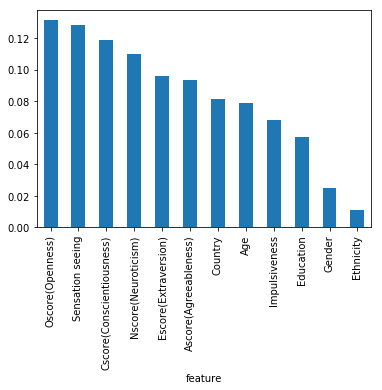

In [13]:
# Посморим на важность признаков

featureImportance = pd.DataFrame({"feature": data.drop('Ecstasy_CL0',axis=1).columns, 
                                  "importance": rfc.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

In [14]:
# Сделаем дополнительную настройку параметров

from sklearn.model_selection import GridSearchCV

parameters = {
              'n_estimators': [500, 700, 1000, 1500],           
                 
             } 

rfc = RandomForestClassifier(random_state=42)   

gcv = GridSearchCV(rfc, parameters, n_jobs= -1) 
gcv.fit(X, y)
gcv.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Accuracy = 0.696113074204947
Precision = 0.735593220338983
Recall = 0.6977491961414791
F1_score = 0.7161716171617161
AUC = 0.756345753735578


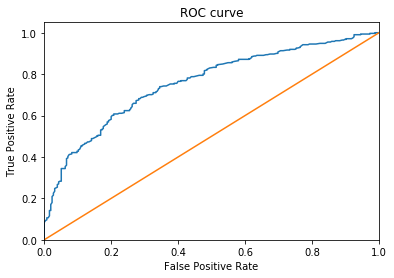

In [15]:
# Посмотрим на метрики качества

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))
print('AUC =', roc_auc_score(y_test, y_proba[:,1]))

fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])

plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [16]:
# Вторая модель - логистическая регрессия

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_predicted = logit.predict(X_test)
y_proba = logit.predict_proba(X_test)


Accuracy = 0.6996466431095406
Precision = 0.7169230769230769
Recall = 0.7491961414790996
F1_score = 0.7327044025157232
AUC = 0.7465355273942373


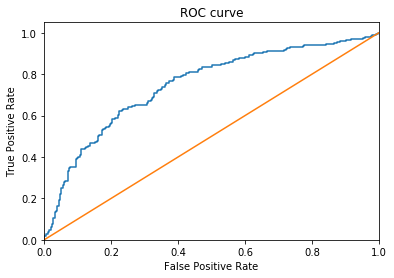

In [17]:
# Посмотрим на метрики качества 


print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))
print('AUC =', roc_auc_score(y_test, y_proba[:,1]))

fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])

plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

### Комментарий к решению
У логита тоже можно было посмотреть на важность признаков и более того - даже посмотреть, как они влияют на вероятность употребления наркотика - так мужчины явно более склонны к его употреблению, возраст тоже повышает шансы

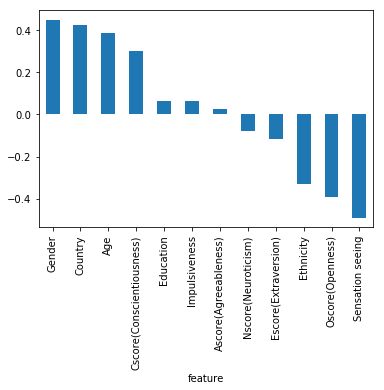

In [18]:
featureImportance = pd.DataFrame({"feature": data.drop('Ecstasy_CL0',axis=1).columns, 
                                  "importance": logit.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');